In [20]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import math

# Section 1.1

a. Cross correlation is a measure of similarity of two signals as a function of the displacement of one relative to the other. The cross correlation of x and y as a function of n computes occurance of any feature in x(t) in y(t+n) time.

b. if both the signals are of size n, then the running time of the "naive" algorithm is O(n^2)

c. The proof is attached with the pdf

d. So, cross correlation between two signals in time domian is pointwise product in fourier domain. Which is computationally very cheap compare to computing sliding inner product in time domain. so, we can transform the signals in fourier domain, perform pointwise product and transform back the signal in time domain. the asymptotic running time will be O(n log n)


# Section 1.2

In [2]:
def cross_correlation_func(x,y):
    fft = np.multiply(np.conj(np.fft.fft(x)), np.fft.fft(y))
    ifft = np.fft.ifft(fft)
    return ifft

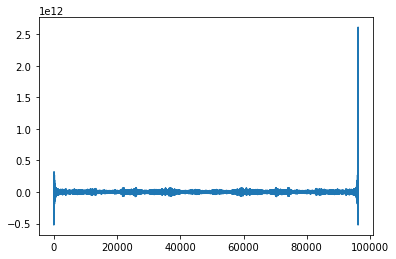

In [6]:
rate1, sensor1 = wavfile.read('Sensor1.wav')
rate2, sensor2 = wavfile.read('Sensor2.wav')
sensor1 = np.reshape(sensor1, (len(sensor1)))
sensor2 = np.reshape(sensor2, (len(sensor2)))
ifft = cross_correlation_func(sensor1, sensor2)
plt.plot(ifft)

The maximum value of the cross correlation function means that by shifting the second signal by the amount of
the X-Value, the two signal match together at best.
we get the peak values in the beginning and in the end. the first signal arrives first

# Section 1.3

In [11]:
def gcc_path_cross_correlation(x,y):
    limit = 10^-3
    conj_dft_y = np.conj(np.fft.fft(y))
    dft_x = np.fft.fft(x)
    
    numer = np.multiply(dft_x, conj_dft_y)
    denom = np.absolute(np.multiply(dft_x, conj_dft_y))
#     for i in range(len(denom)):
#         if denom[i] < limit:
#             denom[i] = limit
            
    g_path = np.divide(numer, denom)
    
    return g_path

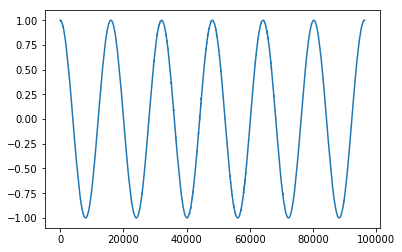

In [12]:
g_path = gcc_path_cross_correlation(sensor1, sensor2)
plt.plot(g_path)

# Section 2.1

In [24]:
def calculate_phi_angle(c, delta_x, delta_t_list):
    phi_angle_list = [math.asin((i * c)/delta_x) for i in delta_t_list]
    return phi_angle_list

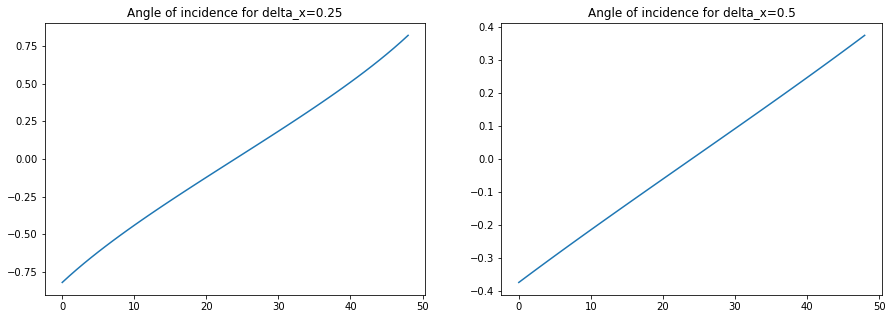

In [33]:
fs = 45000
Ts = 1/fs
delta_x = 0.25
c = 343
m_list = list(range(-24,25))

delta_t_list = [i * Ts for i in m_list]
phi_angle_list_1 = calculate_phi_angle(c, delta_x, delta_t_list)


new_delta_x = 0.5
phi_angle_list_2 = calculate_phi_angle(c, new_delta_x, delta_t_list)

fig = plt.figure(figsize=(15,5))

ax1 = fig.add_subplot(1,2,1)
ax1.title.set_text('Angle of incidence for delta_x=0.25')
ax1.plot(phi_angle_list_1)

ax2 = fig.add_subplot(1,2,2)
ax2.title.set_text('Angle of incidence for delta_x=0.5')
ax2.plot(phi_angle_list_2)

with increase of delta_x value the curve becomes more straight.

# Section 2.2

In [39]:
rate1, sensor1 = wavfile.read('Sensor1.wav')
rate2, sensor2 = wavfile.read('Sensor2.wav')
rate3, sensor3 = wavfile.read('Sensor3.wav')
sensor1 = np.reshape(sensor1, (len(sensor1)))
sensor2 = np.reshape(sensor2, (len(sensor2)))
sensor3 = np.reshape(sensor3, (len(sensor3)))

sense_1_3 = gcc_path_cross_correlation(sensor1, sensor3)
sense_2_3 = gcc_path_cross_correlation(sensor2, sensor3)

ifft_sense_1_3 = max(np.fft.ifft(sense_1_3))
ifft_sense_2_3 = max(np.fft.ifft(sense_2_3))
path = max(ifft_sense_1_3, ifft_sense_2_3)
print("the path of speaker:", str(path))

the path of speaker: (0.2977711735692352-1.8504727345683085e-18j)
